In [5]:
# Modify the file 00_setup.py to define input/output file paths on your system
# The information in 00_setup.py will be used across notebooks
from importlib.machinery import SourceFileLoader
setup = SourceFileLoader("setup", "./00_setup.py").load_module()

# 07: Custom Tree Model
https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/tree_based_models/Example%20of%20loading%20a%20custom%20tree%20model%20into%20SHAP.html

*This script takes about 1 minutes on my MacBook Air*

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from pathlib import Path
import sklearn as sk
import matplotlib as mpl
import warnings
import time
import scipy
import random
from matplotlib.ticker import FormatStrFormatter, PercentFormatter
import scipy.sparse as sp

In [7]:
import graphviz

In [8]:
import shap

In [9]:
node 0
    1          (2)
(3) (4)  

SyntaxError: invalid syntax (1989969377.py, line 1)

In [73]:
# define a custom tree model
tree_dict = {
    "children_left": np.array([1, 3, -1, -1, -1]),
    "children_right": np.array([2, 4, -1, -1, -1]),
    "children_default": np.array([2, 4, -1, -1, -1]),
    "features": np.array([0, 1, -2, -2, -2]),
    "thresholds": np.array([20, 36, -2, -2 -2]),
    "values": np.array([[12],[10],[30], [5], [20]]),
    "node_sample_weight": np.array([1000, 900, 100, 600, 300])
}
model = {
    "trees": [tree_dict]
}

In [115]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
#from sklearn.utils.multiclass import unique_labels
#from sklearn.metrics import euclidean_distances
class TemplateClassifier(BaseEstimator, ClassifierMixin):

    def __init__(self, max_depth=2, tree_dict = tree_dict):
        self.max_depth = max_depth
        self.tree_dict = tree_dict

    def fit(self, X, y):
        return self

    def predict_pair(self, X):
        if X[0] <= self.tree_dict['thresholds'][0]:
            if X[1] <= self.tree_dict['thresholds'][1]:
                return self.tree_dict['values'][3][0]
            else:
                return self.tree_dict['values'][4][0]
        else:
            return self.tree_dict['values'][2][0]
        
    def predict(self, X):
        return X.apply(self.predict_pair, axis=1)
            


In [116]:
x = TemplateClassifier()

In [117]:
x.predict(trial_df)

0     5
1    20
2    30
3    30
dtype: int64

In [108]:
tree_dict.children_left

AttributeError: 'dict' object has no attribute 'children_left'

In [74]:
(5*600 + 300*20 + 30*100)/1000

12.0

In [75]:
(5*600 + 300*20)/900

10.0

In [76]:
explainer = shap.TreeExplainer(model)

In [77]:
trial_df = pd.DataFrame({'int_rate': [10, 10, 30, 30], 'term': [36, 60, 36, 60]})

In [78]:
shap_val = explainer.shap_values(trial_df)

In [79]:
shap_val

array([[-2.25, -4.75],
       [-1.5 ,  9.5 ],
       [20.25, -2.25],
       [13.5 ,  4.5 ]])

In [80]:
shap_ex_val = explainer.shap_interaction_values(trial_df)

In [81]:
shap_ex_val

array([[[-2.  , -0.25],
        [-0.25, -4.5 ]],

       [[-2.  ,  0.5 ],
        [ 0.5 ,  9.  ]],

       [[18.  ,  2.25],
        [ 2.25, -4.5 ]],

       [[18.  , -4.5 ],
        [-4.5 ,  9.  ]]])

In [ ]:
https://stackoverflow.com/questions/59935395/is-it-possible-to-use-a-custom-defined-decision-tree-classifier-in-scikit-learn


In [112]:
from PyALE import ale

In [125]:
# Random data 
check_df = pd.DataFrame({'int_rate':np.random.uniform(0, 40, 100),
                         'term': np.random.choice([36, 60], 100)})

In [127]:
this_ale = ale(X=check_df, model=x, feature=['int_rate', 'term'], plot=False)

Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().


<AxesSubplot: xlabel='int_rate'>

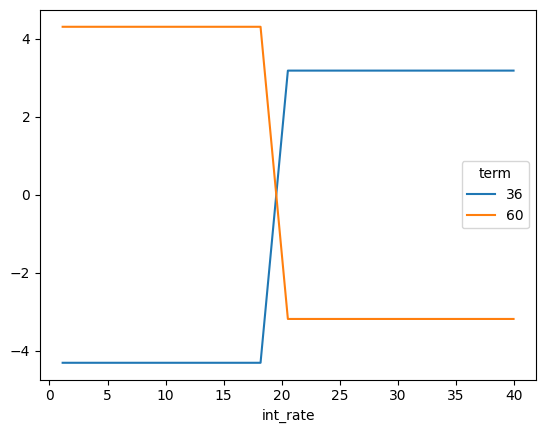

In [128]:
this_ale.plot()

PyALE._ALE_generic:INFO: Continuous feature detected.


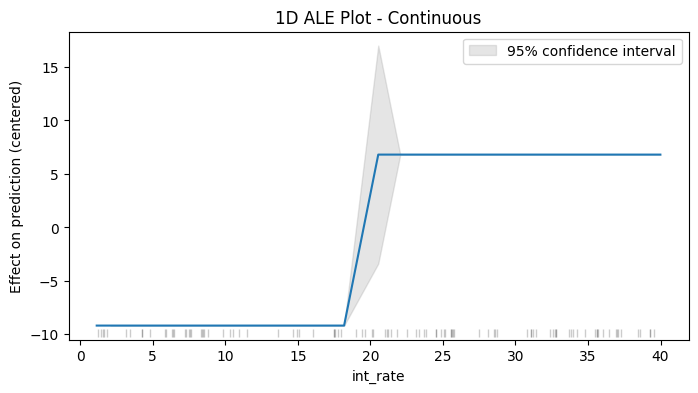

In [130]:
this_ale_int = ale(X=check_df, model=x, feature=['int_rate'], plot=True)

PyALE._ALE_generic:INFO: Discrete feature detected.


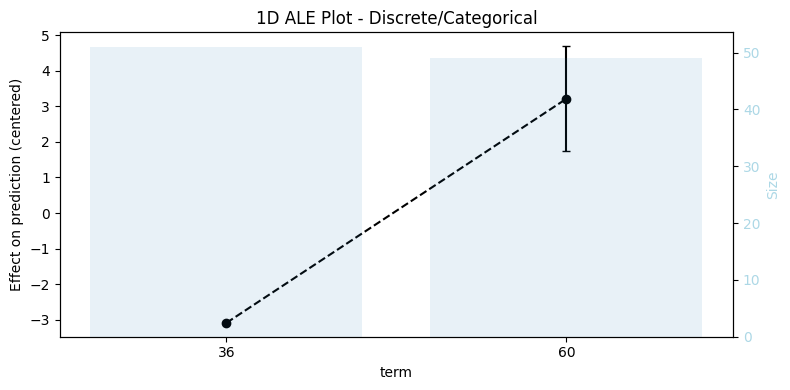

In [131]:
this_ale_int = ale(X=check_df, model=x, feature=['term'], plot=True)

In [ ]:
TO DO 
Clean this up
